In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
base = automap_base()

# reflect the tables
base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = base.classes.measurement
station = base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
latest_date = session.query(measurement.date).order_by(measurement.date.desc()).first()[0]

latest_date

'2017-08-23'

<Figure size 1000x600 with 0 Axes>

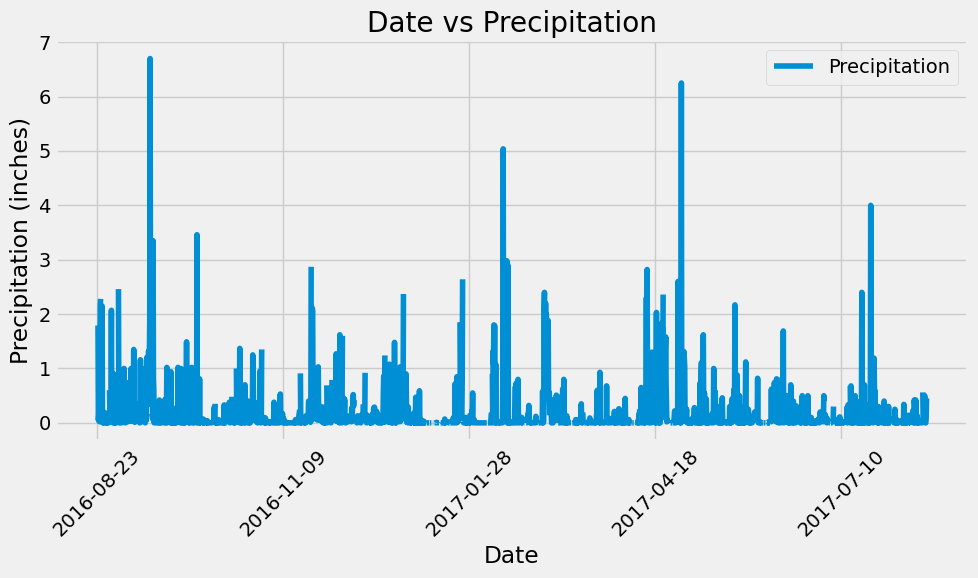

In [10]:
# Find the most recent date in the dataset.
latest_date = session.query(measurement.date).order_by(measurement.date.desc()).first()[0]

# Calculate the date one year from the last date in data set.
one_year_ago = dt.datetime.strptime(latest_date, '%Y-%m-%d') - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
precipitation_data = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= '2016-08-23', measurement.date <= '2017-08-23').all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names.
precipitation_df = pd.DataFrame(precipitation_data, columns=["Date", "Precipitation"])

# Sort the DataFrame by date.
precipitation_df = precipitation_df.sort_values("Date")

# Plot the results using the DataFrame plot method.
plt.figure(figsize=(10, 6))
precipitation_df.plot(x="Date", y="Precipitation", figsize=(10, 6))
plt.title("Date vs Precipitation")
plt.legend(["Precipitation"])
plt.xlabel("Date")
plt.ylabel("Precipitation (inches)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(station).count()
print(f"The total numbers of stations is {total_stations}.")

The total numbers of stations is 9.


In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_station = session.query(measurement.station, func.count(measurement.station)).\
                group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()

most_active_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
tempature = most_active_station[0][0]

min_temp = session.query(func.min(measurement.tobs)).filter(measurement.station == tempature).scalar()
max_temp = session.query(func.max(measurement.tobs)).filter(measurement.station == tempature).scalar()
avg_temp = session.query(func.avg(measurement.tobs)).filter(measurement.station == tempature).scalar()

print(f"The lowest tempature is {min_temp}°, highest tempature is {max_temp}°, and the average tempature is: {avg_temp}°")

The lowest tempature is 54.0°, highest tempature is 85.0°, and the average tempature is: 71.66378066378067°


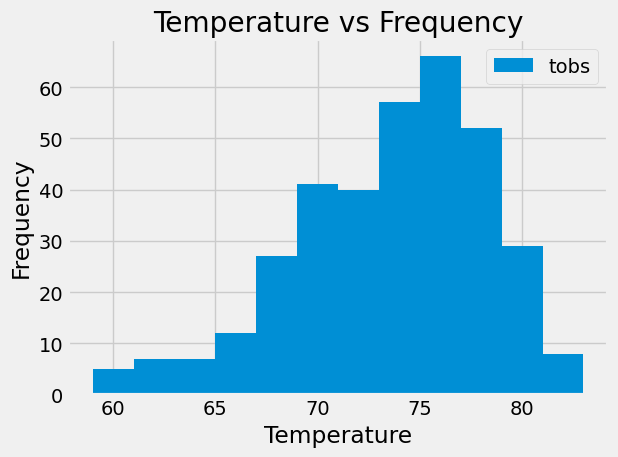

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs_data = session.query(measurement.tobs).\
            filter(measurement.date >= one_year_ago, measurement.station == tempature).all()

tobs_data = [temp[0] for temp in tobs_data]
plt.hist(tobs_data, bins=12)
plt.title("Temperature vs Frequency")
plt.legend(["tobs"])
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Close Session

In [16]:
# Close Session
session.close()